<h1 style="font-size: 38px; text-align: center; color: blue">The implementation of deep learning to develop an adequate tool for identifying the bumblebee species in Ireland</h1>

<br> </br>

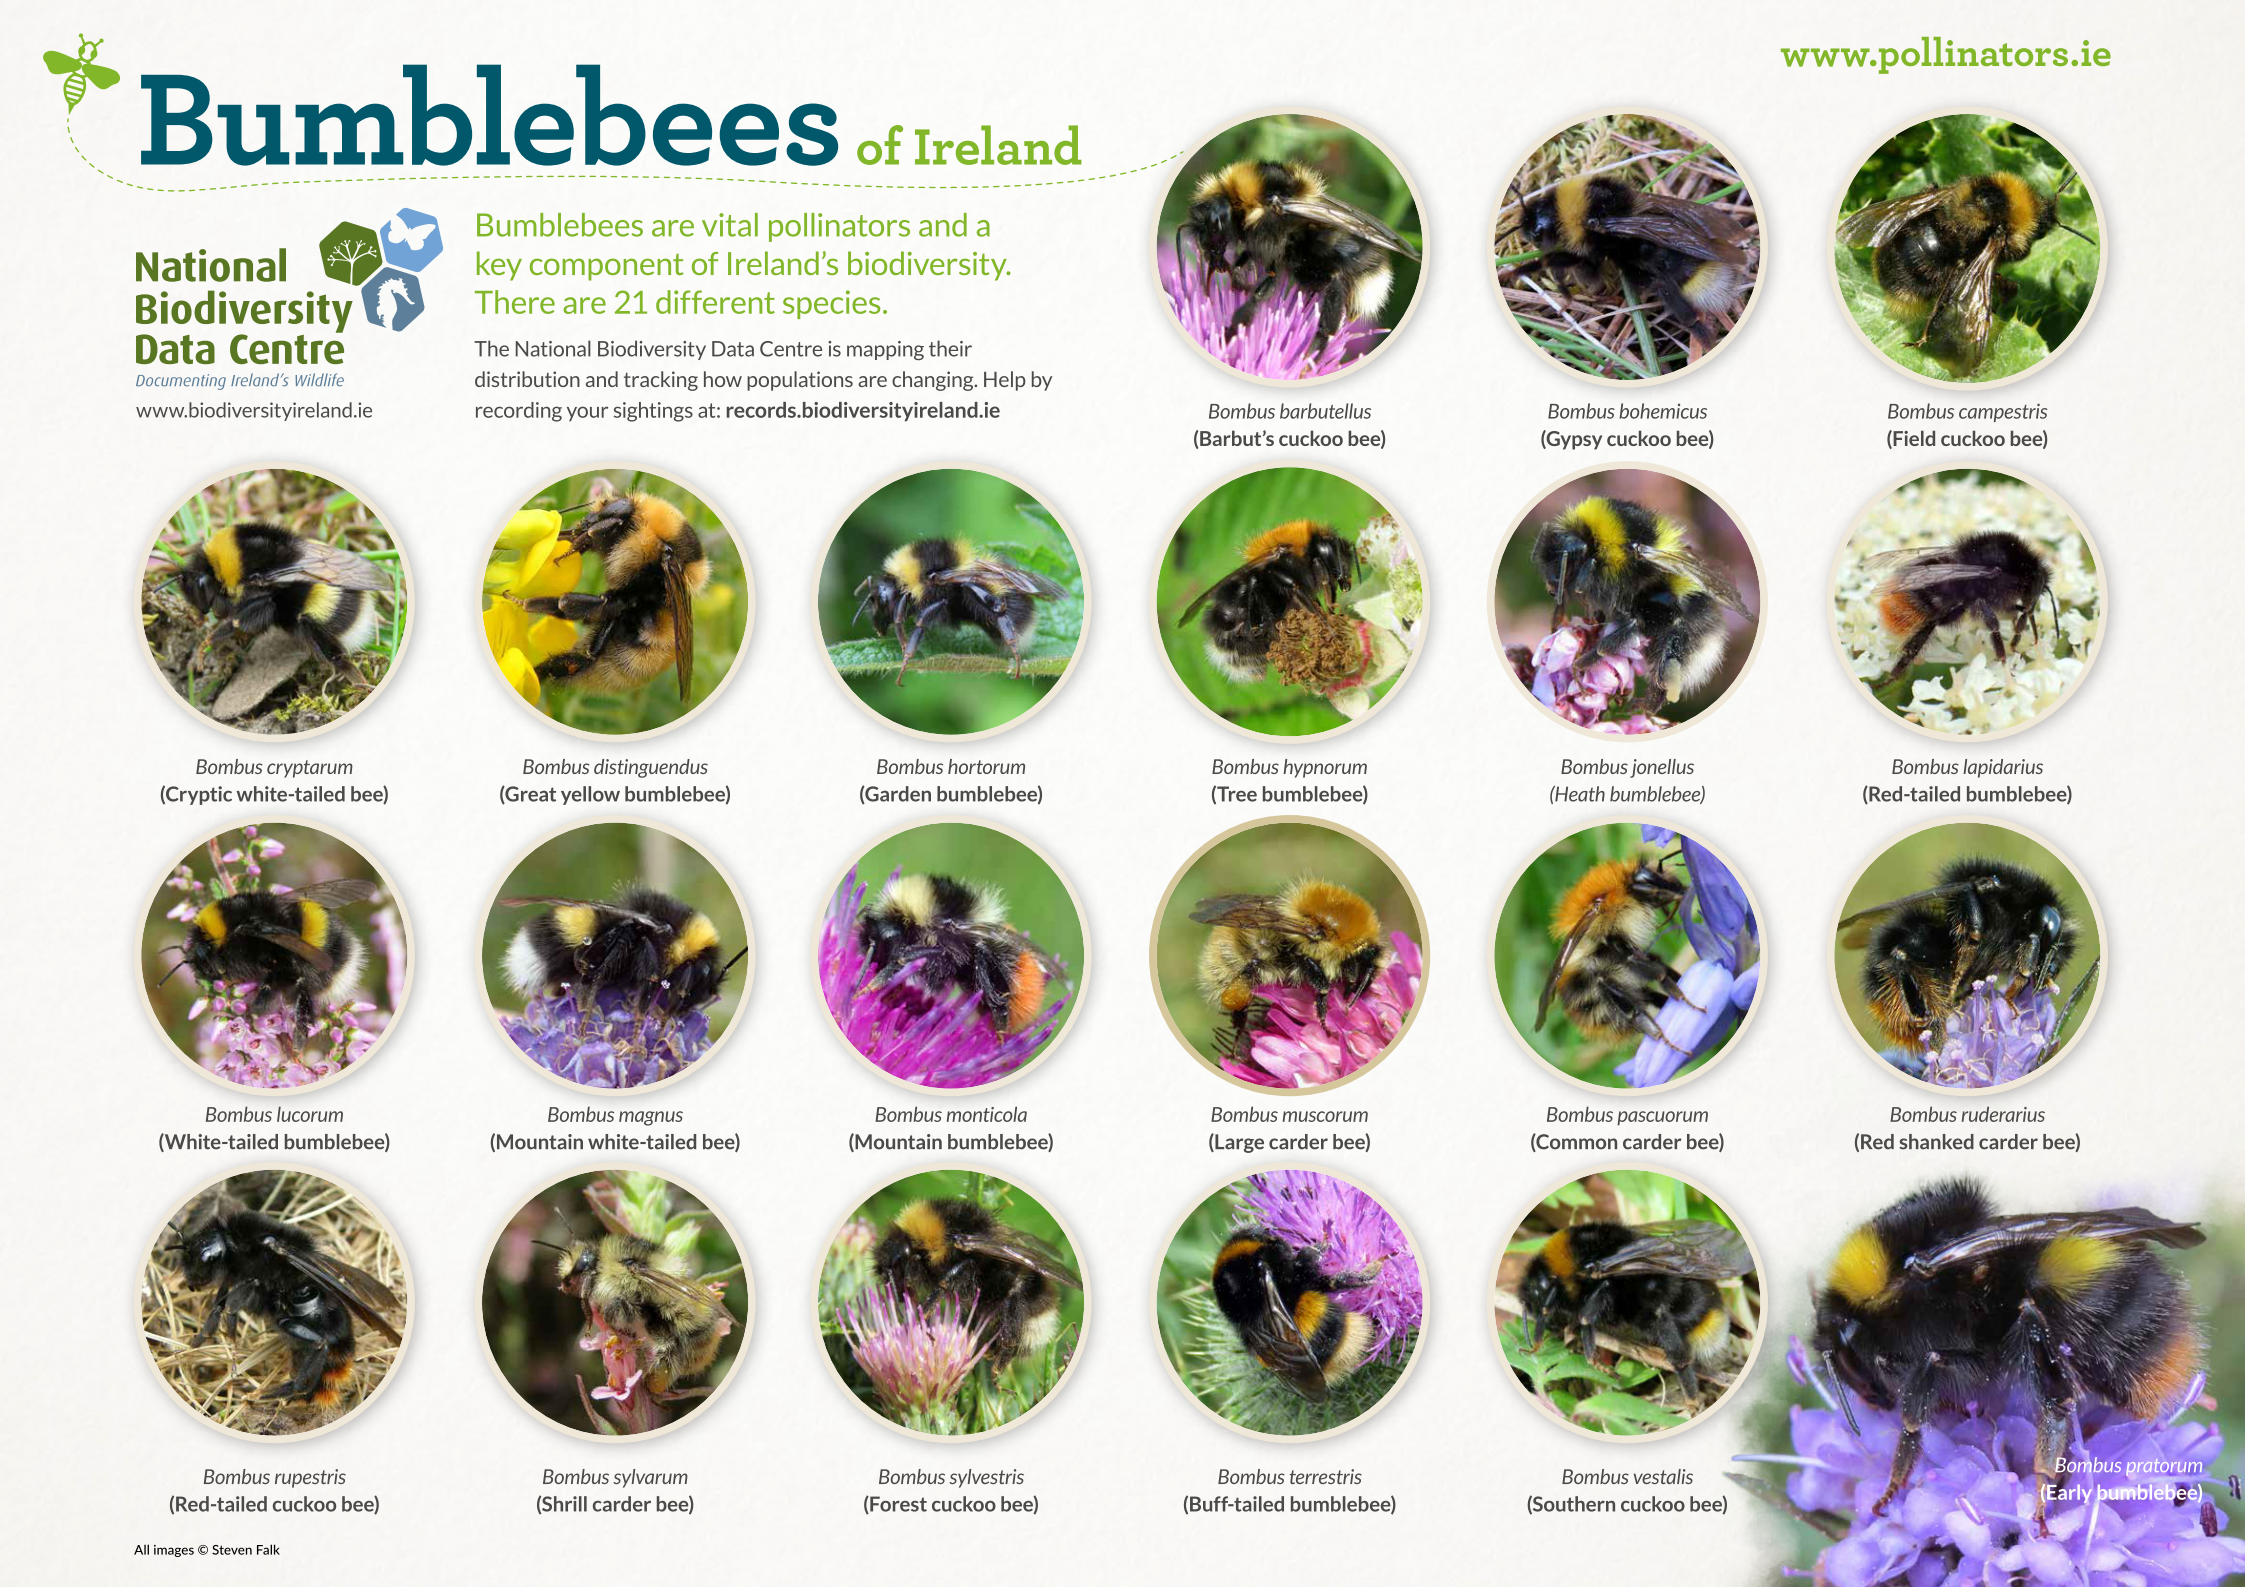

<br> </br>

In [7]:
# Import libraries
import os
import shutil
import random
import xml.etree.ElementTree as ET
import cv2

import warnings
warnings.filterwarnings("ignore")

# Import libraries
import pathlib
import itertools
import glob
import numpy as np

import PIL
from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<br> </br>

<h1 style="font-size: 28px; text-align: center; color: green"> 2. Deep Learning Models Training using Tensorflow and Keras</h1>

<br> </br>

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Resizing, Rescaling, Activation, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

In [6]:
# Set data directory for training, validating and testing
training_data_dir = pathlib.Path('/home/hduser/Desktop/final dataset testing/machine learning/train/')
validate_data_dir = pathlib.Path('/home/hduser/Desktop/final dataset testing/machine learning/validate/')
test_data_dir = pathlib.Path('/home/hduser/Desktop/final dataset testing/test')

print(training_data_dir)
print(validate_data_dir)
print(test_data_dir)

/home/hduser/Desktop/final dataset testing/machine learning/train
/home/hduser/Desktop/final dataset testing/machine learning/validate
/home/hduser/Desktop/final dataset testing/test


<br> </br>
- **Check the image in the train folder**

In [8]:
bombus_barbutellus = list(training_data_dir.glob('bombus barbutellus/*'))
len(bombus_barbutellus)

144

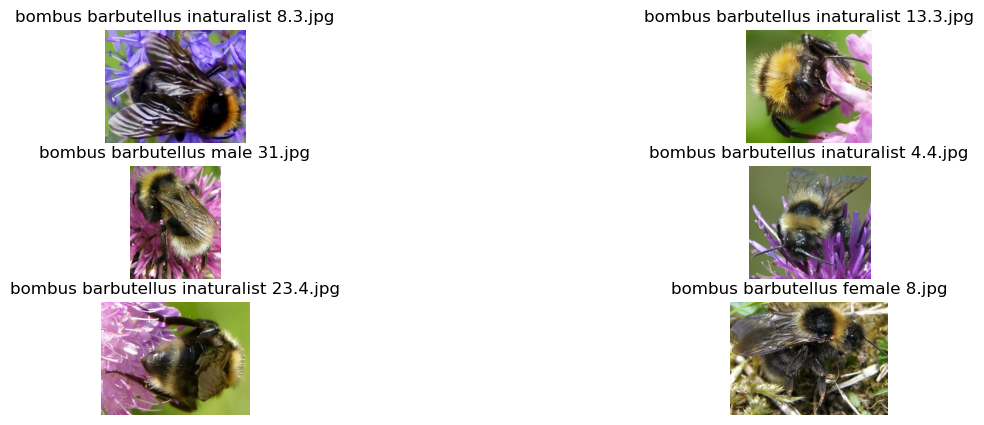

In [9]:
fig, axes = plt.subplots(3, 2, figsize=(15, 5))

# Plot each image
for i in range(6):
    image_path = bombus_barbutellus[i]
    image = Image.open(str(image_path))

    # Extract filename from path
    filename = os.path.basename(image_path)

    # Display the image on the subplot
    axes[i//2, i%2].imshow(image)
    axes[i//2, i%2].set_title(filename)
    axes[i//2, i%2].axis('off')

plt.show()

### Some insights after augmentation

In [ ]:
train_batches_incep_aug = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.inception_v3.preprocess_input,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
) \
    .flow_from_directory(
    training_data_dir,
    target_size=(img_height_incep, img_width_incep),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

In [ ]:
print(len(train_batches_incep))
print(train_batches_incep.n)

In [ ]:
print(len(train_batches_incep_aug))
print(train_batches_incep_aug.n)

In [ ]:
imgs, labels = next(train_batches_incep_aug)

plotImages(imgs)
print(labels)

In [ ]:
epoch_inceptionv3 = 5

result_inceptionv3 = model_inceptionv3.fit(train_batches_incep_aug,
                                           validation_data=validate_batches_incep,
                                           epochs=epoch_inceptionv3,
                                           verbose=2)

In [ ]:
from tensorflow.keras.utils import Sequence

class ConcatenateGenerators(Sequence):
    def __init__(self, generator1, generator2):
        self.generator1 = generator1
        self.generator2 = generator2
        self.batch_size = generator1.batch_size  # Assuming both generators have the same batch size
        self.n = len(generator1) * self.batch_size + len(generator2) * self.batch_size

    def __len__(self):
        return self.n // self.batch_size

    def __getitem__(self, index):
        if index < len(self.generator1) * self.batch_size:
            return self.generator1[index % len(self.generator1)]
        else:
            return self.generator2[index % len(self.generator2)]

# Usage example
train_batches_incep_combined = ConcatenateGenerators(train_batches_incep, train_batches_incep_aug)

In [ ]:
print(len(train_batches_incep_combined))

In [ ]:
print(train_batches_incep_combined.n)

In [ ]:
epoch_inceptionv3 = 5

result_inceptionv3 = model_inceptionv3.fit(train_batches_incep_combined,
                                           validation_data=validate_batches_incep,
                                           epochs=epoch_inceptionv3,
                                           verbose=2)

<br> </br>
## 2.1 Deep learning using tensorflow and keras
<br> </br>

### 2.1.1. InceptionV3

In [10]:
# Specify image size and batch size
img_height_incep, img_width_incep = (299, 299)
batch_size = 32

In [11]:
train_batches_incep = ImageDataGenerator(preprocessing_function=
                                         tf.keras.applications.inception_v3.preprocess_input) \
                    .flow_from_directory(training_data_dir, target_size=(img_height_incep, img_width_incep),
                                         batch_size=batch_size, class_mode='categorical', 
                                         shuffle=True)

Found 3024 images belonging to 21 classes.


In [12]:
validate_batches_incep = ImageDataGenerator(preprocessing_function=
                                            tf.keras.applications.inception_v3.preprocess_input) \
                    .flow_from_directory(validate_data_dir, target_size=(img_height_incep, img_width_incep),
                                         batch_size=batch_size, class_mode='categorical', 
                                         shuffle=True)

Found 756 images belonging to 21 classes.


In [13]:
def plotImages(images_arr):
    fig, axes = plt.subplots(2, 6, figsize=(30,30))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

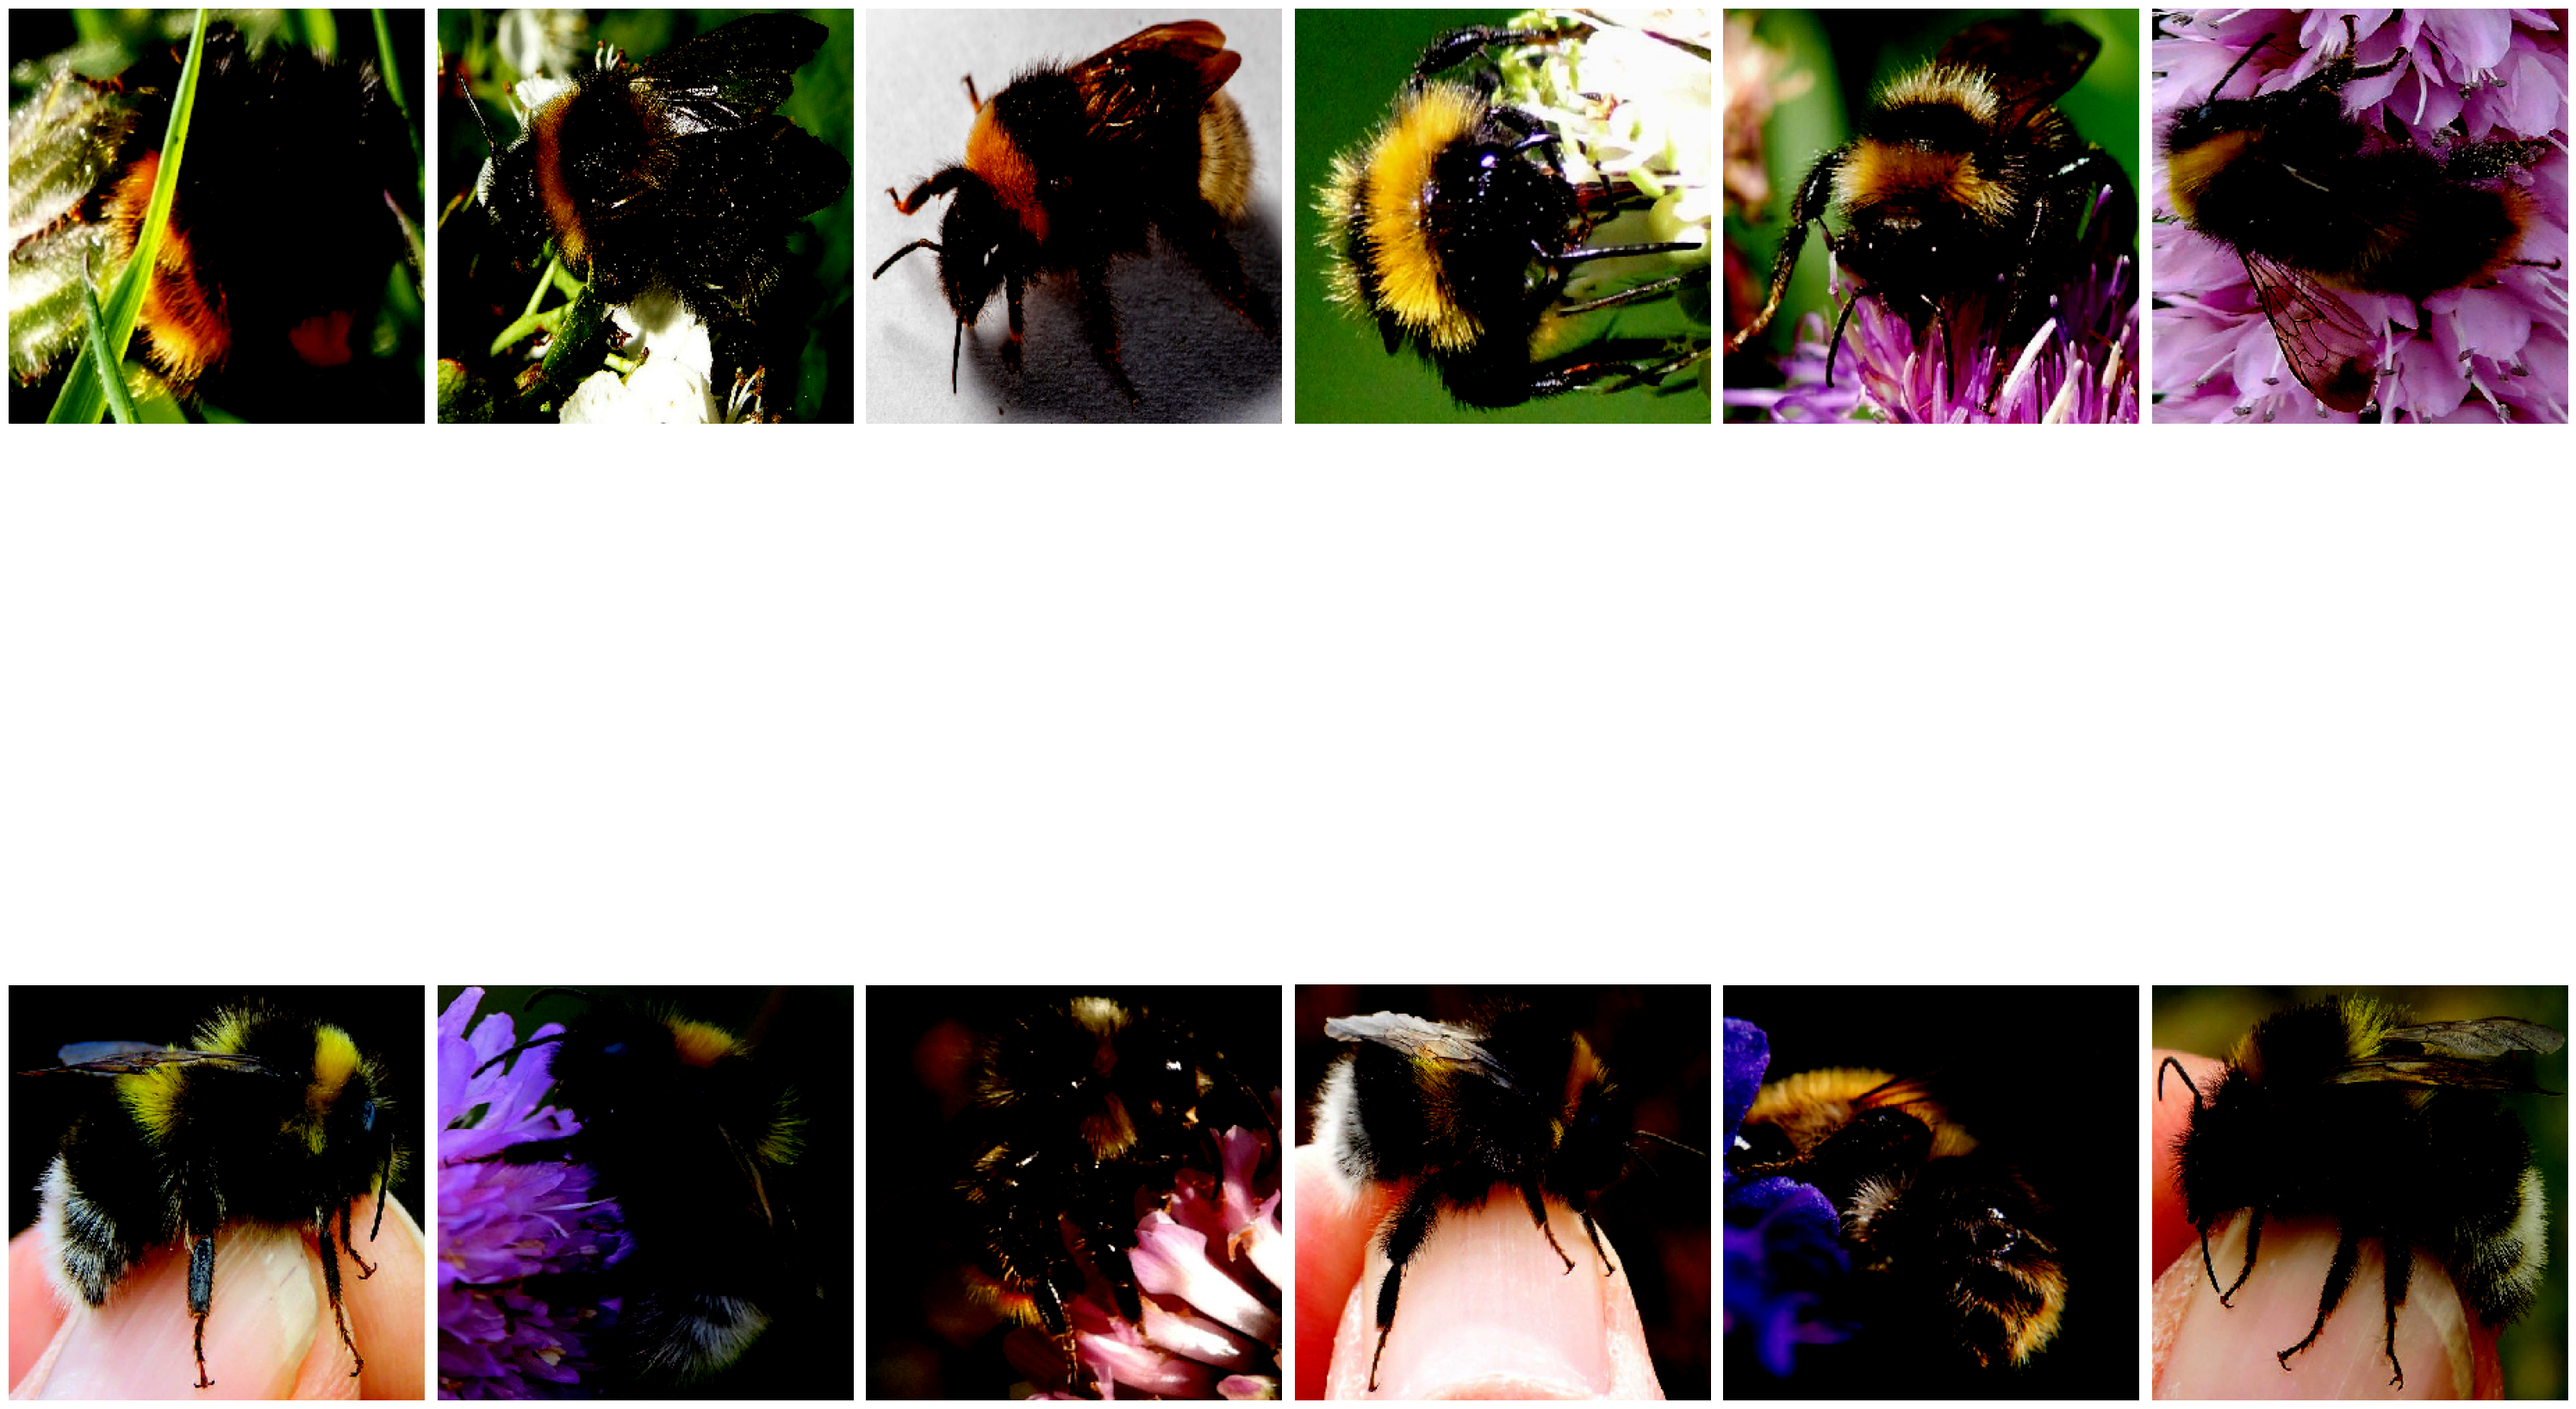

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1.

In [14]:
imgs, labels = next(train_batches_incep)

plotImages(imgs)
print(labels)

In [15]:
inceptionv3 = tf.keras.applications.InceptionV3(
    include_top=False,
    input_shape=(299, 299, 3),
    pooling='avg',
    weights='imagenet')

for layer in inceptionv3.layers:
        layer.trainable=False

2023-11-30 20:44:08.207872: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: alecfei-linuxlaptop
2023-11-30 20:44:08.207886: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:175] hostname: alecfei-linuxlaptop
2023-11-30 20:44:08.207975: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:199] libcuda reported version is: NOT_FOUND: was unable to find libcuda.so DSO loaded into this program
2023-11-30 20:44:08.207991: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:203] kernel reported version is: NOT_FOUND: could not find kernel module information in driver version file contents: "NVRM version: NVIDIA UNIX Open Kernel Module for x86_64  545.23.06  Release Build  (dvs-builder@U16-I3-C17-2-2)  Sun Oct 15 17:35:00 UTC 2023
GCC version:  gcc version 11.4.0 (Ubuntu 11.4.0-1ubuntu1~22.04) 
"


In [16]:
inceptionv3.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 149, 149, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 149, 149, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 149, 149, 32)         0         ['batch_normalizati

 conv2d_11 (Conv2D)          (None, 35, 35, 32)           6144      ['average_pooling2d[0][0]']   
                                                                                                  
 batch_normalization_5 (Bat  (None, 35, 35, 64)           192       ['conv2d_5[0][0]']            
 chNormalization)                                                                                 
                                                                                                  
 batch_normalization_7 (Bat  (None, 35, 35, 64)           192       ['conv2d_7[0][0]']            
 chNormalization)                                                                                 
                                                                                                  
 batch_normalization_10 (Ba  (None, 35, 35, 96)           288       ['conv2d_10[0][0]']           
 tchNormalization)                                                                                
          

                                                                                                  
 activation_17 (Activation)  (None, 35, 35, 96)           0         ['batch_normalization_17[0][0]
                                                                    ']                            
                                                                                                  
 activation_18 (Activation)  (None, 35, 35, 64)           0         ['batch_normalization_18[0][0]
                                                                    ']                            
                                                                                                  
 mixed1 (Concatenate)        (None, 35, 35, 288)          0         ['activation_12[0][0]',       
                                                                     'activation_14[0][0]',       
                                                                     'activation_17[0][0]',       
          

                                                                                                  
 conv2d_28 (Conv2D)          (None, 35, 35, 96)           55296     ['activation_27[0][0]']       
                                                                                                  
 batch_normalization_28 (Ba  (None, 35, 35, 96)           288       ['conv2d_28[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_28 (Activation)  (None, 35, 35, 96)           0         ['batch_normalization_28[0][0]
                                                                    ']                            
                                                                                                  
 conv2d_26 (Conv2D)          (None, 17, 17, 384)          995328    ['mixed2[0][0]']              
          

 conv2d_30 (Conv2D)          (None, 17, 17, 192)          147456    ['mixed3[0][0]']              
                                                                                                  
 conv2d_33 (Conv2D)          (None, 17, 17, 192)          172032    ['activation_32[0][0]']       
                                                                                                  
 conv2d_38 (Conv2D)          (None, 17, 17, 192)          172032    ['activation_37[0][0]']       
                                                                                                  
 conv2d_39 (Conv2D)          (None, 17, 17, 192)          147456    ['average_pooling2d_3[0][0]'] 
                                                                                                  
 batch_normalization_30 (Ba  (None, 17, 17, 192)          576       ['conv2d_30[0][0]']           
 tchNormalization)                                                                                
          

                                                                    ']                            
                                                                                                  
 average_pooling2d_4 (Avera  (None, 17, 17, 768)          0         ['mixed4[0][0]']              
 gePooling2D)                                                                                     
                                                                                                  
 conv2d_40 (Conv2D)          (None, 17, 17, 192)          147456    ['mixed4[0][0]']              
                                                                                                  
 conv2d_43 (Conv2D)          (None, 17, 17, 192)          215040    ['activation_42[0][0]']       
                                                                                                  
 conv2d_48 (Conv2D)          (None, 17, 17, 192)          215040    ['activation_47[0][0]']       
          

                                                                                                  
 activation_52 (Activation)  (None, 17, 17, 160)          0         ['batch_normalization_52[0][0]
                                                                    ']                            
                                                                                                  
 activation_57 (Activation)  (None, 17, 17, 160)          0         ['batch_normalization_57[0][0]
                                                                    ']                            
                                                                                                  
 average_pooling2d_5 (Avera  (None, 17, 17, 768)          0         ['mixed5[0][0]']              
 gePooling2D)                                                                                     
                                                                                                  
 conv2d_50

 batch_normalization_62 (Ba  (None, 17, 17, 192)          576       ['conv2d_62[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 batch_normalization_67 (Ba  (None, 17, 17, 192)          576       ['conv2d_67[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_62 (Activation)  (None, 17, 17, 192)          0         ['batch_normalization_62[0][0]
                                                                    ']                            
                                                                                                  
 activation_67 (Activation)  (None, 17, 17, 192)          0         ['batch_normalization_67[0][0]
          

                                                                                                  
 conv2d_71 (Conv2D)          (None, 8, 8, 320)            552960    ['activation_70[0][0]']       
                                                                                                  
 conv2d_75 (Conv2D)          (None, 8, 8, 192)            331776    ['activation_74[0][0]']       
                                                                                                  
 batch_normalization_71 (Ba  (None, 8, 8, 320)            960       ['conv2d_71[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 batch_normalization_75 (Ba  (None, 8, 8, 192)            576       ['conv2d_75[0][0]']           
 tchNormalization)                                                                                
          

                                                                                                  
 activation_82 (Activation)  (None, 8, 8, 384)            0         ['batch_normalization_82[0][0]
                                                                    ']                            
                                                                                                  
 activation_83 (Activation)  (None, 8, 8, 384)            0         ['batch_normalization_83[0][0]
                                                                    ']                            
                                                                                                  
 batch_normalization_84 (Ba  (None, 8, 8, 192)            576       ['conv2d_84[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activatio

                                                                                                  
 activation_88 (Activation)  (None, 8, 8, 384)            0         ['batch_normalization_88[0][0]
                                                                    ']                            
                                                                                                  
 activation_91 (Activation)  (None, 8, 8, 384)            0         ['batch_normalization_91[0][0]
                                                                    ']                            
                                                                                                  
 activation_92 (Activation)  (None, 8, 8, 384)            0         ['batch_normalization_92[0][0]
                                                                    ']                            
                                                                                                  
 batch_nor

In [17]:
model_inceptionv3 = Sequential()

model_inceptionv3.add(inceptionv3)
model_inceptionv3.add(Flatten())
model_inceptionv3.add(Dense(512, activation='relu'))
model_inceptionv3.add(Dropout(0.2))
model_inceptionv3.add(Dense(21, activation='softmax'))

In [18]:
model_inceptionv3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 2048)              21802784  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 21)                10773     
                                                                 
Total params: 22862645 (87.21 MB)
Trainable params: 1059861 (4.04 MB)
Non-trainable params: 21802784 (83.17 MB)
_________________________________________________________________


In [ ]:
model_inceptionv3.compile(optimizer=Adam(learning_rate=0.001),
                          loss='categorical_crossentropy',
                          metrics=['accuracy'])

In [ ]:
epoch_inceptionv3 = 10

result_inceptionv3 = model_inceptionv3.fit(train_batches_incep,
                                           validation_data=validate_batches_incep,
                                           epochs=epoch_inceptionv3,
                                           verbose=2)

<br> </br>
- <h1 style="font-size: 16px"> Create functions for plotting results using Keras. </h1>
<br> </br>

In [ ]:
# Create a function for plotting accuracy fluctuation

def plot_accuracy(epochs, history, model_name):
    plt.figure(figsize=(8, 8))
    
    epochs_range = range(1, epochs + 1)
    plt.plot(epochs_range, history['accuracy'], label="Training Accuracy", color='green')
    plt.plot(epochs_range, history['val_accuracy'], label="Validation Accuracy", color='blue', linestyle='--')
    
    plt.ylim(0, 1)
    plt.grid(True, alpha=0.7)
    
    plt.title(f'Train and Validation Accuracy of {model_name} Model')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.legend(['train', 'validation'])
    
    plt.show()

In [ ]:
# Create a function for plotting loss fluctuation

def plot_loss(epochs, history, model_name):
    plt.figure(figsize=(8, 8))
    
    epochs_range = range(1, epochs + 1)
    plt.plot(epochs_range, history['loss'], label="Training Loss", color='green')
    plt.plot(epochs_range, history['val_loss'], label="Validation Loss", color='blue', linestyle='--')

    plt.grid(True, alpha=0.7)
    
    plt.title(f'Train and Validation Loss of {model_name} Model')
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.legend(['train', 'validation'])

    plt.show()

In [ ]:
# Create a function for plotting confusion matrix
def plot_confusion_matrix(model, batches, model_name):
    # Get the number of batches
    num_batches = len(batches)

    # Make predictions for each batch
    predictions = []
    true_labels = []

    for i in range(num_batches):
        # Get a batch of data
        batch_data, batch_labels = batches[i]

        # Make predictions for the batch
        batch_predictions = model.predict(batch_data)
        predictions.extend(np.argmax(batch_predictions, axis=1))
        
        # Extract true labels from the batch
        true_labels.extend(np.argmax(batch_labels, axis=1))

    # Convert lists to numpy arrays
    predicted_labels = np.array(predictions)
    true_labels = np.array(true_labels)

    # Get class names from the data generator
    class_names = list(batches.class_indices.keys())

    # Compute the confusion matrix
    cm = confusion_matrix(true_labels, predicted_labels)

    # Plot the confusion matrix using seaborn
    plt.figure(figsize=(14, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)

    # Loop to annotate each cell in the heatmap
    for i in range(len(class_names)):
        for j in range(len(class_names)):
            plt.text(j + 0.5, i + 0.5, str(cm[i, j]), ha='center', va='center',
                     bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.3'))

    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix of {model_name} Model', fontsize=20)
    plt.show()

In [ ]:
# Create a function for plotting report overview

def plot_classification_report(model, batches, model_name):
    # Get the number of batches
    num_batches = len(batches)

    # Make predictions for each batch
    predictions = []
    true_labels = []

    for i in range(num_batches):
        # Get a batch of data
        batch_data, batch_labels = batches[i]

        # Make predictions for the batch
        batch_predictions = model.predict(batch_data)
        predictions.extend(np.argmax(batch_predictions, axis=1))
        
        # Extract true labels from the batch
        true_labels.extend(np.argmax(batch_labels, axis=1))

    # Convert lists to numpy arrays
    predicted_labels = np.array(predictions)
    true_labels = np.array(true_labels)

    # Get class names from the data generator
    class_names = list(batches.class_indices.keys())

    
    # Generate classification report dictionary
    report_dict = classification_report(true_labels, predicted_labels, 
                                        target_names=class_names, output_dict=True)

    # Extract metrics for each class
    precision = [report_dict[class_name]['precision'] for class_name in class_names]
    recall = [report_dict[class_name]['recall'] for class_name in class_names]
    f1_score = [report_dict[class_name]['f1-score'] for class_name in class_names]

    # Plotting using subplots
    fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(16, 18), sharex=True)

    # Plot precision
    axs[0].bar(class_names, precision, color='blue')
    axs[0].set_ylabel('Precision')
    axs[0].set_title('Precision by Class')
    axs[0].grid(True, alpha=0.5)

    # Plot recall
    axs[1].bar(class_names, recall, color='green')
    axs[1].set_ylabel('Recall')
    axs[1].set_title('Recall by Class')
    axs[1].grid(True, alpha=0.5)

    # Plot F1-score
    axs[2].bar(class_names, f1_score, color='orange')
    axs[2].set_xlabel('Class Names')
    axs[2].set_ylabel('F1-Score')
    axs[2].set_title('F1-Score by Class')
    axs[2].grid(True, alpha=0.5)

    # Adjust layout and rotate x-axis labels
    plt.tight_layout(pad=7.0)
    plt.xticks(rotation=45, ha='right')
    
    # Add a title on top
    plt.suptitle(f'Classification Report Overview of {model_name} Model', fontsize=20)

    plt.show()

In [ ]:
# Create a function for printing classification report

def print_classification_report(model, batches):
   # Get the number of batches
    num_batches = len(batches)

    # Make predictions for each batch
    predictions = []
    true_labels = []

    for i in range(num_batches):
        # Get a batch of data
        batch_data, batch_labels = batches[i]

        # Make predictions for the batch
        batch_predictions = model.predict(batch_data)
        predictions.extend(np.argmax(batch_predictions, axis=1))
        
        # Extract true labels from the batch
        true_labels.extend(np.argmax(batch_labels, axis=1))

    # Convert lists to numpy arrays
    predicted_labels = np.array(predictions)
    true_labels = np.array(true_labels)

    # Get class names from the data generator
    class_names = list(batches.class_indices.keys())

    # Generate classification report
    report = classification_report(true_labels, predicted_labels, target_names=class_names)
    
    print("Classification Report:\n", report)

In [ ]:
# Create a function for plotting ROC curves

def plot_roc_curves(model, batches, model_name):
    # Get the number of batches
    num_batches = len(batches)

    # Make predictions for each batch
    predictions = []
    true_labels = []

    for i in range(num_batches):
        # Get a batch of data
        batch_data, batch_labels = batches[i]

        # Make predictions for the batch
        batch_predictions = model.predict(batch_data)
        predictions.extend(batch_predictions)
        
        # Extract true labels from the batch
        true_labels.extend(batch_labels)

    # Convert lists to numpy arrays
    predicted_labels = np.array(predictions)
    true_labels = np.array(true_labels)

    # Get class names from the data generator
    class_names = list(batches.class_indices.keys())

    plt.figure(figsize=(14, 10))

    for class_index in range(len(class_names)):
        # Binarize true labels for the current class
        true_labels_bin = label_binarize(true_labels[:, class_index], classes=[0, 1])

        # Compute ROC curve and AUC
        fpr, tpr, _ = roc_curve(true_labels_bin, predicted_labels[:, class_index])
        auc_score = auc(fpr, tpr)

        label = f'{class_names[class_index]} (AUC = {auc_score:.2f})'
        plt.plot(fpr, tpr, label=label)

    plt.xlabel('False Positive Rate (Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    
    plt.title(f'ROC Curves of {model_name} Model', fontsize=16)
    plt.grid(True, alpha=0.5)
    plt.legend(loc='lower right', bbox_to_anchor=(1, 0), ncol=2, title="Species Name")

    plt.show()

<br> </br>

In [ ]:
plot_accuracy(epoch_inceptionv3, result_inceptionv3.history, 'InceptionV3')

In [ ]:
plot_loss(epoch_inceptionv3, result_inceptionv3.history, 'InceptionV3')

In [ ]:
plot_confusion_matrix(model_inceptionv3, validate_batches_incep, 'InceptionV3')

In [ ]:
plot_classification_report(model_inceptionv3, validate_batches_incep, 'InceptionV3')

In [ ]:
print_classification_report(model_inceptionv3, validate_batches_incep)

In [ ]:
plot_roc_curves(model_inceptionv3, validate_batches_incep, 'InceptionV3')

### 2.1.2. ResNet101

In [ ]:
# Specify image size and batch size
img_height_resnet, img_width_resnet = (224, 224)
batch_size = 32

In [ ]:
train_batches_resnet = ImageDataGenerator(preprocessing_function=
                                         tf.keras.applications.resnet.preprocess_input) \
                    .flow_from_directory(training_data_dir, target_size=(img_height_resnet, img_width_resnet),
                                         batch_size=batch_size, class_mode='categorical', 
                                         shuffle=True)

In [ ]:
validate_batches_resnet = ImageDataGenerator(preprocessing_function=
                                            tf.keras.applications.resnet.preprocess_input) \
                    .flow_from_directory(validate_data_dir, target_size=(img_height_resnet, img_width_resnet),
                                         batch_size=batch_size, class_mode='categorical', 
                                         shuffle=True)

In [ ]:
imgs, labels = next(train_batches_resnet)

plotImages(imgs)
print(labels)

In [ ]:
resnet101 = tf.keras.applications.ResNet101(
    include_top=False,
    input_shape=(224, 224, 3),
    pooling='avg',
    weights='imagenet')

for layer in resnet101.layers:
        layer.trainable=False

In [ ]:
resnet101.summary()

In [ ]:
model_resnet101 = Sequential()

model_resnet101.add(resnet101)
model_resnet101.add(Flatten())
model_resnet101.add(Dense(512, activation='relu'))
model_resnet101.add(Dropout(0.2))
model_resnet101.add(Dense(21, activation='softmax'))

In [ ]:
model_resnet101.summary()

In [ ]:
model_resnet101.compile(optimizer=Adam(learning_rate=0.001),
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

In [ ]:
epoch_resnet101 = 15

result_resnet101 = model_resnet101.fit(train_batches_resnet,
                                       validation_data=validate_batches_resnet,
                                       epochs=epoch_resnet101,
                                       verbose=2)

In [ ]:
plot_accuracy(epoch_resnet101, result_resnet101.history, 'ResNet101')

In [ ]:
plot_loss(epoch_resnet101, result_resnet101.history, 'ResNet101')

### 2.1.3. VGG19

In [ ]:
# Specify image size and batch size
img_height_vgg, img_width_vgg = (224, 224)
batch_size = 32

In [ ]:
train_batches_vgg = ImageDataGenerator(preprocessing_function=
                                       tf.keras.applications.vgg19.preprocess_input) \
                    .flow_from_directory(training_data_dir, target_size=(img_height_vgg, img_width_vgg),
                                         batch_size=batch_size, class_mode='categorical', 
                                         shuffle=True)

In [ ]:
validate_batches_vgg = ImageDataGenerator(preprocessing_function=
                                          tf.keras.applications.vgg19.preprocess_input) \
                    .flow_from_directory(validate_data_dir, target_size=(img_height_vgg, img_width_vgg),
                                         batch_size=batch_size, class_mode='categorical', 
                                         shuffle=True)

In [ ]:
imgs, labels = next(train_batches_vgg)

plotImages(imgs)
print(labels)

In [ ]:
vgg19 = tf.keras.applications.VGG19(
    include_top=False,
    input_shape=(224, 224, 3),
    pooling='avg',
    weights='imagenet')

for layer in vgg19.layers:
        layer.trainable=False

In [ ]:
vgg19.summary()

In [ ]:
model_vgg19 = Sequential()

model_vgg19.add(vgg19)
model_vgg19.add(Flatten())
model_vgg19.add(Dense(512, activation='relu'))
model_vgg19.add(Dropout(0.2))
model_vgg19.add(Dense(21, activation='softmax'))

In [ ]:
model_vgg19.summary()

In [ ]:
model_vgg19.compile(optimizer=Adam(learning_rate=0.001),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

In [ ]:
epoch_vgg19 = 10

result_vgg19 = model_vgg19.fit(train_batches_vgg,
                               validation_data=validate_batches_vgg,
                               epochs=epoch_vgg19,
                               verbose=2)

In [ ]:
plot_accuracy(epoch_vgg19, result_vgg19.history, 'VGG19')

In [ ]:
plot_loss(epoch_vgg19, result_vgg19.history, 'VGG19')

### 2.1.4. MobileNetV3Large

In [ ]:
# Specify image size and batch size
img_height_mob, img_width_mob = (224, 224)
batch_size = 32

In [ ]:
train_batches_mob = ImageDataGenerator(preprocessing_function=
                                       tf.keras.applications.mobilenet_v3.preprocess_input) \
                    .flow_from_directory(training_data_dir, target_size=(img_height_mob, img_width_mob),
                                         batch_size=batch_size, class_mode='categorical', 
                                         shuffle=True)

In [ ]:
validate_batches_mob = ImageDataGenerator(preprocessing_function=
                                       tf.keras.applications.mobilenet_v3.preprocess_input) \
                    .flow_from_directory(validate_data_dir, target_size=(img_height_mob, img_width_mob),
                                         batch_size=batch_size, class_mode='categorical', 
                                         shuffle=True)

In [ ]:
imgs, labels = next(train_batches_mob)

plotImages(imgs)
print(labels)

In [ ]:
mobilenetv3 = tf.keras.applications.MobileNetV3Large(
    include_top=False,
    input_shape=(224, 224, 3),
    pooling='avg',
    weights='imagenet')

for layer in mobilenetv3.layers:
        layer.trainable=False

In [ ]:
mobilenetv3.summary()

In [ ]:
model_mobilenetv3 = Sequential()

model_mobilenetv3.add(mobilenetv3)
model_mobilenetv3.add(Flatten())
model_mobilenetv3.add(Dense(512, activation='relu'))
model_mobilenetv3.add(Dropout(0.2))
model_mobilenetv3.add(Dense(21, activation='softmax'))

In [ ]:
model_mobilenetv3.summary()

In [ ]:
model_mobilenetv3.compile(optimizer=Adam(learning_rate=0.001),
                          loss='categorical_crossentropy',
                          metrics=['accuracy'])

In [ ]:
epoch_mobilenetv3 = 10

result_mobilenetv3 = model_mobilenetv3.fit(train_batches_mob,
                                           validation_data=validate_batches_mob,
                                           epochs=epoch_mobilenetv3,
                                           verbose=2)

In [ ]:
plot_accuracy(epoch_mobilenetv3, result_mobilenetv3.history, 'MobileNetV3Large')

In [ ]:
plot_loss(epoch_mobilenetv3, result_mobilenetv3.history, 'MobileNetV3Large')

### 2.1.5. EfficientNetV2 Large

In [ ]:
# Specify image size and batch size
img_height_eff, img_width_eff = (224, 224)
batch_size = 32

In [ ]:
train_batches_eff = ImageDataGenerator(preprocessing_function=
                                       tf.keras.applications.efficientnet_v2.preprocess_input) \
                    .flow_from_directory(training_data_dir, target_size=(img_height_eff, img_width_eff),
                                         batch_size=batch_size, class_mode='categorical', 
                                         shuffle=True)

In [ ]:
validate_batches_eff = ImageDataGenerator(preprocessing_function=
                                       tf.keras.applications.efficientnet_v2.preprocess_input) \
                    .flow_from_directory(validate_data_dir, target_size=(img_height_eff, img_width_eff),
                                         batch_size=batch_size, class_mode='categorical', 
                                         shuffle=True)

In [ ]:
imgs, labels = next(train_batches_eff)

plotImages(imgs)
print(labels)

In [ ]:
efficientnetv2 = tf.keras.applications.EfficientNetV2L(
    include_top=False,
    input_shape=(480, 480, 3),
    pooling='avg',
    weights='imagenet')

for layer in efficientnetv2.layers:
        layer.trainable=False

In [ ]:
efficientnetv2.summary()

In [ ]:
model_efficientnetv2 = Sequential()

model_efficientnetv2.add(efficientnetv2)
model_efficientnetv2.add(Flatten())
model_efficientnetv2.add(Dense(512, activation='relu'))
model_efficientnetv2.add(Dropout(0.2))
model_efficientnetv2.add(Dense(21, activation='softmax'))

In [ ]:
model_efficientnetv2.summary()

In [ ]:
model_efficientnetv2.compile(optimizer=Adam(learning_rate=0.001),
                             loss='categorical_crossentropy',
                             metrics=['accuracy'])

In [ ]:
epoch_efficientnetv2 = 5

result_efficientnetv2 = model_efficientnetv2.fit(train_batches_eff,
                                                 validation_data=validate_batches_eff,
                                                 epochs=epoch_efficientnetv2,
                                                 verbose=2)

In [ ]:
plot_accuracy(epoch_efficientnetv2, result_efficientnetv2.history, 'EfficientNetV2_Large')

In [ ]:
plot_loss(epoch_efficientnetv2, result_efficientnetv2.history, 'EfficientNetV2_Large')